In [1]:
import numpy as np
import pandas as pd

import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("Advertising.csv")

In [3]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
df.shape

(200, 4)

We're gonna use single linear regression

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


There are not null values

In [6]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


Some statistical information, but only for numerical columns. For categorical columns, they need to be specified.

Our target has to be explainable linearly if we wanna use linear regression model.

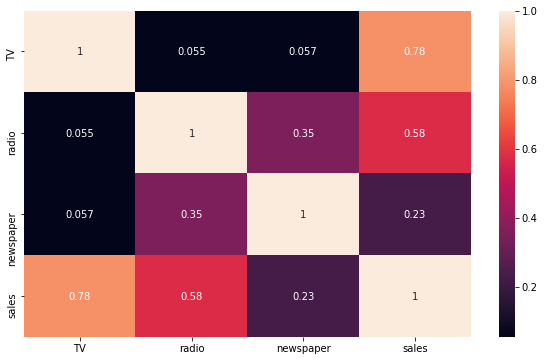

In [8]:
plt.figure(figsize = (10,6))
sns.heatmap(df.corr(), annot = True);

In [9]:
df.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [30]:
def plot_relation(df, target_var):
    num_cols = df.columns
    for col in num_cols:
        if col != target_var:
            plt.figure()
            sns.lmplot(x=col, y=target_var, data=df, height=7)
            plt.xlabel(f"variable name: {col}")
            plt.ylabel("Sales")

<Figure size 720x432 with 0 Axes>

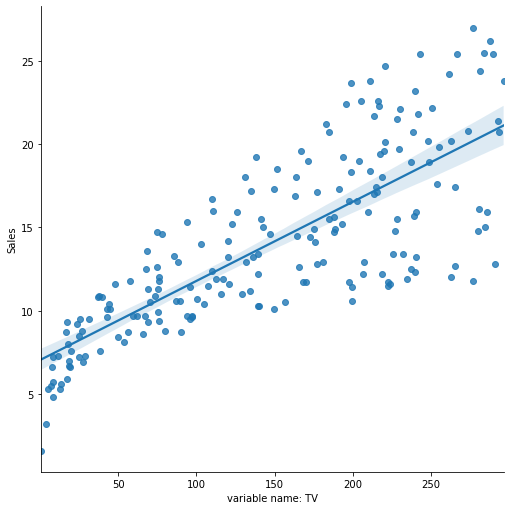

<Figure size 720x432 with 0 Axes>

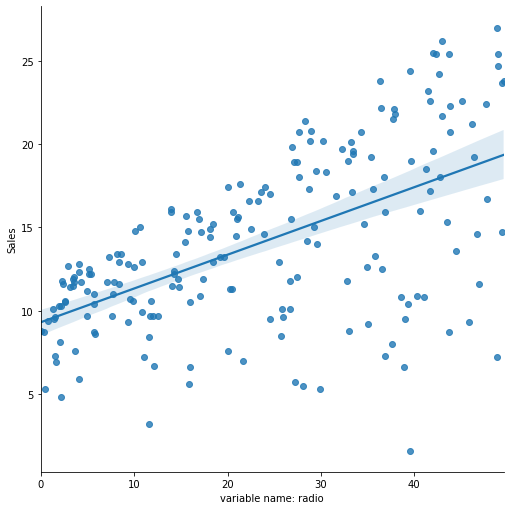

<Figure size 720x432 with 0 Axes>

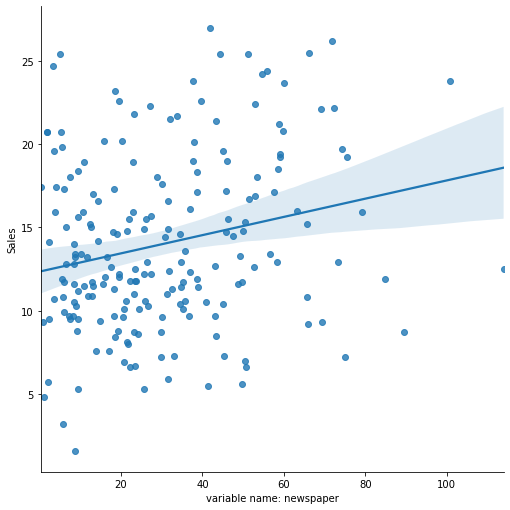

In [31]:
plot_relation(df, "sales");

In [32]:
def check_dist(df, var):
    plt.figure(figsize=(12,5))
    plt.subplot(1, 2, 1)
    sns.histplot(x=var, data=df)
    plt.subplot(1, 2, 2)
    stats.probplot(df[var], dist="norm", plot=plt)
    plt.show()

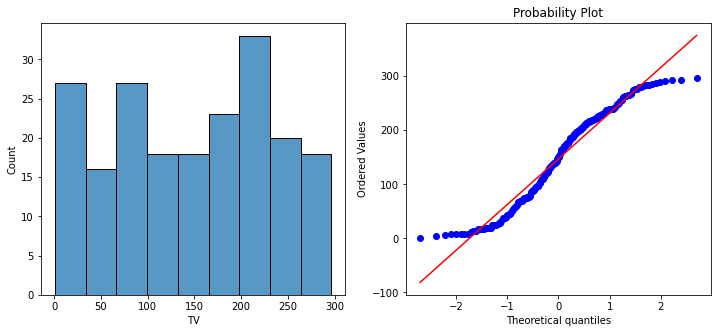

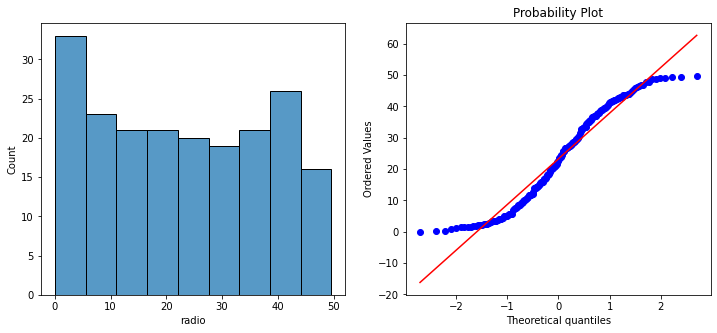

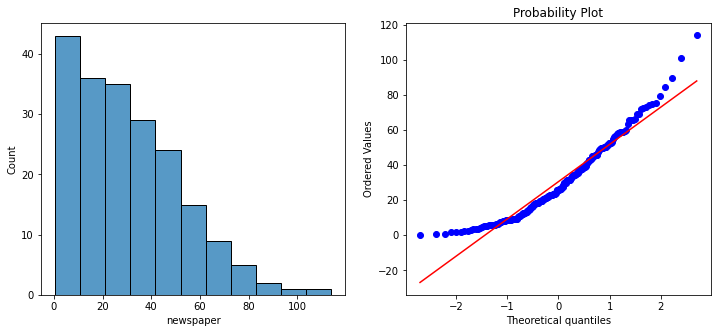

In [33]:
for col in df.drop("sales", axis=1).columns:
    check_dist(df, col)

In [34]:
df["total_spend"] = df.TV + df.radio + df.newspaper

In [35]:
df.head()

,TV,radio,newspaper,sales,total_spend
0,230.1,37.8,69.2,22.1,337.1
1,44.5,39.3,45.1,10.4,128.9
2,17.2,45.9,69.3,9.3,132.4
3,151.5,41.3,58.5,18.5,251.3
4,180.8,10.8,58.4,12.9,250.0


In [37]:
corr = df["sales"].corr(df["total_spend"])

In [38]:
corr

0.8677123027017427

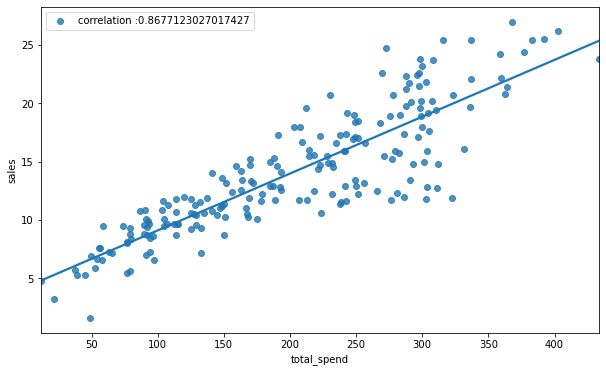

In [41]:
plt.figure(figsize=(10,6))
sns.regplot(x = "total_spend", y = "sales", data = df, ci = None, label = f"correlation :{corr}")
plt.legend()

## R2 score

In [42]:
R2_score = corr ** 2

In [43]:
R2_score

0.7529246402599608

In [ ]:
# y = mx + b

In [44]:
X = df.total_spend
y = df.sales

In [45]:
X_mat = np.vstack([X, np.ones(len(X))]).T

In [47]:
X_mat

array([[337.1,   1. ],
       [128.9,   1. ],
       [132.4,   1. ],
       [251.3,   1. ],
       [250. ,   1. ],
       [132.6,   1. ],
       [113.8,   1. ],
       [151.4,   1. ],
       [ 11.7,   1. ],
       [223.6,   1. ],
       [ 96.1,   1. ],
       [242.7,   1. ],
       [124.8,   1. ],
       [112.3,   1. ],
       [283. ,   1. ],
       [296. ,   1. ],
       [218.4,   1. ],
       [376.8,   1. ],
       [108. ,   1. ],
       [190.3,   1. ],
       [299.5,   1. ],
       [266. ,   1. ],
       [ 78.7,   1. ],
       [271.4,   1. ],
       [ 93.2,   1. ],
       [285.9,   1. ],
       [184.8,   1. ],
       [279.7,   1. ],
       [298.8,   1. ],
       [127.4,   1. ],
       [364.4,   1. ],
       [168.9,   1. ],
       [128.7,   1. ],
       [285.9,   1. ],
       [104.5,   1. ],
       [303.3,   1. ],
       [315.7,   1. ],
       [169.8,   1. ],
       [104.9,   1. ],
       [297.7,   1. ],
       [256.4,   1. ],
       [249.1,   1. ],
       [323.1,   1. ],
       [241

In [48]:
np.linalg.lstsq(X_mat, y, rcond=None)

(array([0.04868788, 4.24302822]),
 array([1338.44397617]),
 2,
 array([3128.85849135,    5.92883485]))

In [49]:
m, c = np.linalg.lstsq(X_mat, y, rcond=None)[0]

In [50]:
m, c

(0.04868787931904815, 4.243028216036325)

## Method 2:

In [51]:
np.polyfit(X, y, deg=1)

array([0.04868788, 4.24302822])

In [52]:
b1 = np.polyfit(X, y, deg=1)[0]
b0 = np.polyfit(X, y, deg=1)[1]

predict = b1 * X + b0

In [ ]:
# y = b1x + b0

In [53]:
values = {"actuel":y, "predicted":predict, "residual":y-predict, "LSE":(y-predict)**2}

In [54]:
df_2 = pd.DataFrame(values)
df_2

,actuel,predicted,residual,LSE
0,22.1,20.655712,1.444288,2.085967
1,10.4,10.518896,-0.118896,0.014136
2,9.3,10.689303,-1.389303,1.930164
3,18.5,16.478292,2.021708,4.087302
4,12.9,16.414998,-3.514998,12.355211
...,...,...,...,...
195,7.6,6.954943,0.645057,0.416098
196,9.7,9.462369,0.237631,0.056469
197,12.8,13.625183,-0.825183,0.680926
198,25.5,23.318939,2.181061,4.757026


In [55]:
np.sum(df_2["residual"]).round()

-0.0

In [57]:
df_2.LSE.sum()

1338.4439761715594

<AxesSubplot:xlabel='residual', ylabel='Density'>

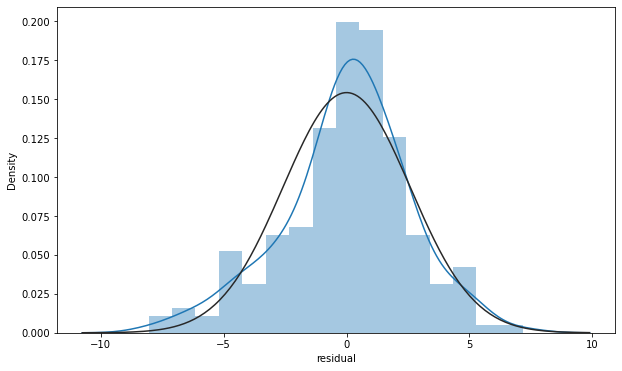

In [58]:
plt.figure(figsize=(10,6))
sns.distplot(df_2["residual"], fit = stats.norm)

- histogram plot, that we need to check for controlling our best possible regression line.
- residual = has to be normally distributed as above.
- if skewed, your regression line is not the best fit one.